In [1]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pickle
X_train_smote = pickle.load(open("X_train_smote.p", "rb"))
X_test = pickle.load(open("X_test.p", "rb"))
y_train_smote = pickle.load(open("y_train_smote.p", "rb"))
y_test = pickle.load(open("y_test.p", "rb" ))


In [3]:
n_estimators = range(100, 1000, 50)
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6]
gamma = [0,0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5]
max_depth = [1,2]
param = dict(n_estimators=n_estimators,
             learning_rate = learning_rate,
             gamma = gamma,
             max_depth = max_depth )

In [4]:
XGclf = xgb.XGBClassifier()
XGclf_Rand = RandomizedSearchCV(XGclf, param, cv = 5, scoring = 'roc_auc')

In [5]:
X_train_smote

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,1,4,7,2,26,0,17,4,0,0,...,0,1,0,1,1,0,1,0,0,1
1,1,18,7,9,63,4,21,0,0,0,...,0,1,0,1,1,0,0,1,1,0
2,1,18,7,2,43,1,8,0,0,0,...,0,1,0,1,1,0,0,1,0,1
3,6,1,17,2,62,0,16,1,0,0,...,0,1,0,1,1,0,1,0,0,1
4,5,3,17,4,22,1,20,0,0,1,...,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,3,1,1,3,42,0,8,0,1,8,...,0,1,0,1,1,0,0,1,1,0
15748,1,1,6,6,61,0,23,0,0,0,...,0,1,0,1,1,0,1,0,0,1
15749,3,3,1,4,30,0,18,0,0,2,...,0,1,0,1,1,0,0,1,0,1
15750,1,1,7,1,28,1,12,0,1,8,...,0,1,0,1,1,0,0,1,0,1


In [6]:
X_test

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glipizide-metformin_Steady,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
24632,2,1,17,3,23,0,18,0,2,0,...,0,1,0,1,1,0,1,0,0,1
90765,3,1,1,2,24,3,15,0,0,0,...,0,1,0,1,1,0,1,0,0,1
52153,1,6,7,4,39,4,19,0,0,0,...,0,1,0,1,1,0,0,1,0,1
358,6,25,1,4,41,5,18,0,0,0,...,0,1,0,1,1,0,1,0,0,1
18533,3,6,4,7,42,0,8,0,0,0,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48413,3,1,1,2,48,2,15,1,0,0,...,0,1,0,1,1,0,0,1,1,0
95743,2,22,7,6,51,4,23,0,0,2,...,0,1,0,1,1,0,0,1,0,1
92889,1,3,7,7,58,0,19,0,0,0,...,0,1,0,1,1,0,0,1,0,1
51263,1,1,1,1,38,0,14,1,0,2,...,0,1,0,1,1,0,1,0,0,1


In [7]:
XGclf_Rand.fit(X_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                      

In [8]:
XGclf_Rand.best_params_

{'n_estimators': 900, 'max_depth': 2, 'learning_rate': 0.6, 'gamma': 0.75}

In [9]:
XGclf_Rand.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.75, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
XGclf1 = xgb.XGBClassifier(max_depth=2, n_estimators=900,learning_rate=0.6, gamma=0.75,random_state=0)
XGclf1.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.75, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
y_pred4 = XGclf1.predict(X_test)
XGclf1_predict_proba = XGclf1.predict_proba(X_test)

In [16]:
# c) Calculate the confusion matrix and classification report 
# d) Calculate the AUC score
print(classification_report(y_test, y_pred4))
print("accuracy score is :", accuracy_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.93      0.65      0.77     26555
           1       0.17      0.58      0.26      3293

    accuracy                           0.65     29848
   macro avg       0.55      0.61      0.52     29848
weighted avg       0.84      0.65      0.71     29848

accuracy score is : 0.6455373894398284


In [17]:
XGclf1_pred = XGclf1_predict_proba[:,1]
print(roc_auc_score(y_test, XGclf1_pred))

0.6549419201866211


<AxesSubplot:>

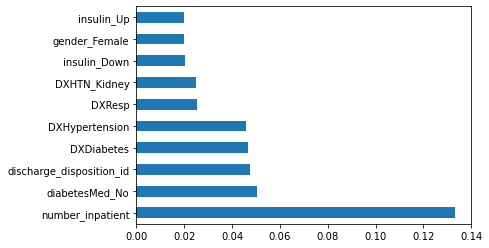

In [26]:
XGclf_best = XGclf_Rand.best_estimator_
(pd.Series(XGclf_best.feature_importances_, index = X_train_smote.columns).nlargest(10).plot(kind='barh'))

In [21]:
# f) predict for the train data. 
y_pred_train = XGclf1.predict(X_train_smote)
print(classification_report(y_train_smote, y_pred_train))
print("accuracy score is :", accuracy_score(y_train_smote, y_pred_train))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      7876
           1       0.67      0.61      0.64      7876

    accuracy                           0.65     15752
   macro avg       0.66      0.65      0.65     15752
weighted avg       0.66      0.65      0.65     15752

accuracy score is : 0.654393092940579


In [24]:
#feature importance

feature_importances = pd.DataFrame(XGclf_best.feature_importances_,
                                   index = X_train_smote.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
number_inpatient,0.133334
diabetesMed_No,0.050432
discharge_disposition_id,0.047511
DXDiabetes,0.046632
DXHypertension,0.045830
...,...
max_glu_serum_Norm,0.000000
rosiglitazone_Down,0.000000
metformin_Down,0.000000
age_60-70),0.000000
